In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sb
import seaborn as mp
import seaborn as cb
import pandas_ta


from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#Read data for Tesla stock from beginning of 2019 until now from yahoo to dataframe
df = web.DataReader('TSLA',data_source = 'yahoo', start='2019-01-01',end='2021-11-01') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 715 entries, 2019-01-02 to 2021-11-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       715 non-null    float64
 1   Low        715 non-null    float64
 2   Open       715 non-null    float64
 3   Close      715 non-null    float64
 4   Volume     715 non-null    float64
 5   Adj Close  715 non-null    float64
dtypes: float64(6)
memory usage: 39.1 KB


In [4]:
#Keep values for adjusted close
df = df[['Adj Close']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 715 entries, 2019-01-02 to 2021-11-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  715 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


,Adj Close
Date,
2019-01-02,62.023998
2019-01-03,60.071999
2019-01-04,63.537998
2019-01-07,66.991997
2019-01-08,67.070000


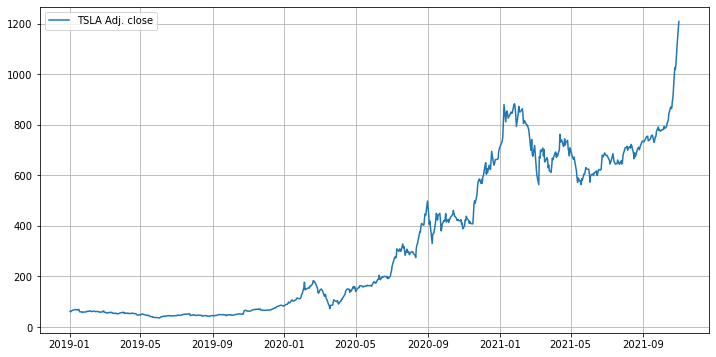

In [5]:
#Plot adj. close values
plt.figure(figsize=(12, 6))
plt.plot(df, label='TSLA Adj. close')
plt.legend()
plt.grid()
plt.show()

In [6]:
#Calculate and append 20-day exponential moving average
df.ta.ema(close='adj Close', length=20, append=True)
df.head(20)

,Adj Close,EMA_20
Date,,
2019-01-02,62.023998,NaN
2019-01-03,60.071999,NaN
2019-01-04,63.537998,NaN
2019-01-07,66.991997,NaN
2019-01-08,67.070000,NaN
2019-01-09,67.706001,NaN
2019-01-10,68.994003,NaN
2019-01-11,69.452003,NaN
2019-01-14,66.879997,NaN


In [7]:
#Remove first 19 (NaN) entries
df = df.iloc[19:]
df.head(10)

,Adj Close,EMA_20
Date,,
2019-01-30,61.754002,63.813600
2019-01-31,61.403999,63.584114
2019-02-01,62.442001,63.475342
2019-02-04,62.577999,63.389880
2019-02-05,64.269997,63.473701
2019-02-06,63.444000,63.470872
2019-02-07,61.501999,63.283361
2019-02-08,61.160000,63.081136
2019-02-11,62.568001,63.032266


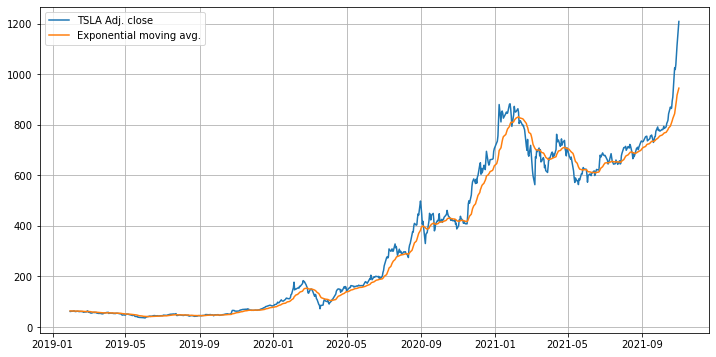

In [8]:
#Plot 20-day EMA against adjusted close
plt.gcf().set_size_inches(12, 6, forward=True)
plt.plot(df['Adj Close'], label='TSLA Adj. close')
plt.plot(df['EMA_20'], label='Exponential moving avg.')
plt.legend()
plt.grid()

In [9]:
#Split values for adj. close and EMA into train and test sets (80/20)
x_train, x_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_20']], test_size=0.2)

In [10]:
#Train model using sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
#Predict price from test values, calculate coefficient of determination
y_pred=lr.predict(x_test)
print(x_test)
lr.score(y_pred,x_test)

             Adj Close
Date                  
2021-01-07  816.039978
2020-07-29  299.821991
2021-07-07  644.650024
2019-06-26   43.854000
2020-08-18  377.417999
...                ...
2020-09-10  371.339996
2020-03-13  109.323997
2020-03-26  105.632004
2019-07-11   47.720001
2021-03-04  621.440002

[140 rows x 1 columns]


0.9838163874637229

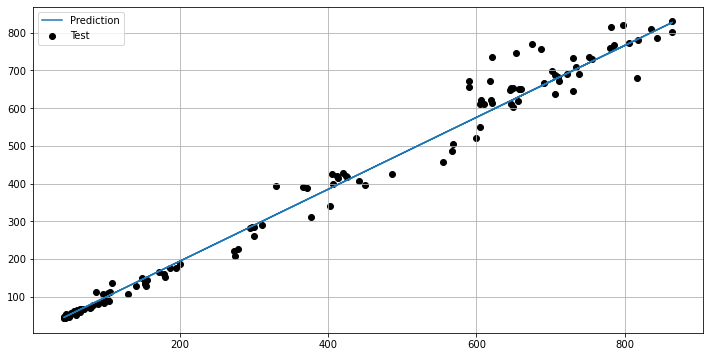

In [12]:
plt.gcf().set_size_inches(12, 6, forward=True)
plt.scatter(x_test, y_test, color='black', label='Test')
plt.plot(x_test, y_pred, label='Prediction')
#plt.plot(df['EMA_20'], label='Exponential moving avg.')
plt.legend()
plt.grid()